# Text Processing - Yelp 2021 - Part 0

This notebook covers:
* Wordclouds

## Imports and Global Settings

In [2]:
# Common Libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Wordclouds
from wordcloud import WordCloud, STOPWORDS
# Connecting to Postgres RDS on AWS
from sqlalchemy import create_engine
from sqlalchemy.dialects import postgresql

pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Import Data

In [3]:
db_endpoint = None
db_name = "yelp_2021_db"
db_password = None

In [4]:
engine = create_engine(f"postgresql+psycopg2://postgres:{db_password}@{db_endpoint}/{db_name}")

In [5]:
query = "SELECT review_id, review_text, target_ufc_bool FROM text_data_train LIMIT 10000"

In [6]:
df = pd.read_sql(sql=query, con=engine)

## Dataframe Pre-Processing

In [7]:
df.head(5)

,review_id,review_text,target_ufc_bool
0,SrWIM6DKaMpFFn4_Rz9NYA,Love this place and could not believe how inex...,False
1,SrXq06PXEkTWBgb66T_dEQ,We ate here this evening and found it to be am...,True
2,Sr_wED27j5LUjMPfzBnacQ,I'm surprised I haven't reviewed this trailer ...,True
3,Sro-5LdL7gb62gLohVZSgA,"Service is excellent, friendly staff. Very pat...",False
4,SsePPnd2ldQgneV4OVnitw,Wandered upon this place while exploring the s...,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review_id        10000 non-null  object
 1   review_text      10000 non-null  object
 2   target_ufc_bool  10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [9]:
df.target_ufc_bool.value_counts()

True     5101
False    4899
Name: target_ufc_bool, dtype: int64

## Splitting Text

In [10]:
corpus = df.review_text
text_target = df[['target_ufc_bool', 'review_text']]
Q_corpus = df[df["target_ufc_bool"] == "True"]["review_text"]
NQ_corpus = df[df["target_ufc_bool"] == "False"]["review_text"]
print(f'Corpus Size: Total:{corpus.size}, Quality:{Q_corpus.size}, Not Quality:{NQ_corpus.size}')

Corpus Size: Total:10000, Quality:5101, Not Quality:4899


## WordClouds

### Wordcloud Stopwords

In [11]:
stopwords = set(STOPWORDS)
stopwords.update([])

#### Join Corpus Into One String

In [12]:
Q_text = " ".join(review for review in Q_corpus)
NQ_text = " ".join(review for review in NQ_corpus)

### Make Wordclouds

In [13]:
Q_wordcloud = WordCloud(stopwords=stopwords, background_color="cornflowerblue", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(Q_text)

In [14]:
NQ_wordcloud = WordCloud(stopwords=stopwords, background_color="lightcoral", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(NQ_text)

### Save and Show Wordclouds

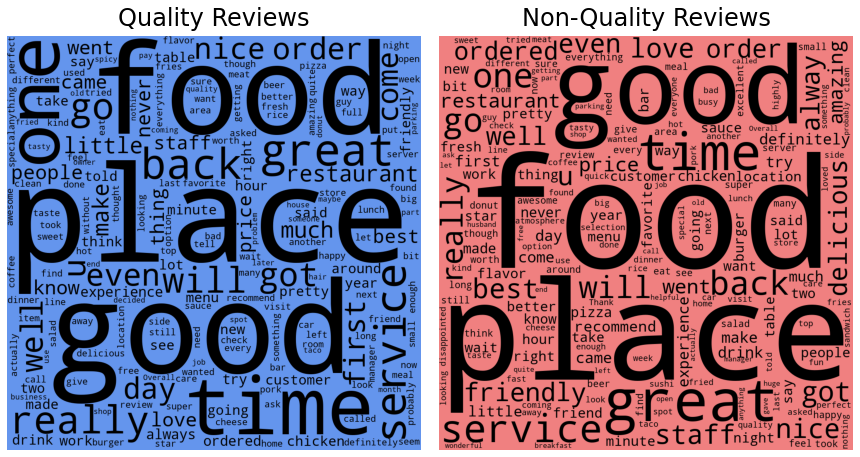

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.imshow(Q_wordcloud)
ax1.axis("off")
ax1.set_title("Quality Reviews", fontsize=24, pad=10)


ax2.imshow(NQ_wordcloud)
ax2.axis("off")
ax2.set_title("Non-Quality Reviews", fontsize=24, pad=10)

fig.tight_layout(pad=0)

# plt.savefig('../images/review_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()